In [90]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

os.environ['KAGGLE_CONFIG_DIR']="."

!kaggle competitions download -c udea-ai-4-eng-20251-pruebas-saber-pro-colombia
!chmod 600 ~/.kaggle/kaggle.json
!unzip udea-ai-4-eng-20251-pruebas-saber-pro-colombia.zip

y
udea-ai-4-eng-20251-pruebas-saber-pro-colombia.zip: Skipping, found more recently modified local copy (use --force to force download)
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Archive:  udea-ai-4-eng-20251-pruebas-saber-pro-colombia.zip
replace submission_example.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: Y
  inflating: submission_example.csv  
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: Y
  inflating: test.csv                
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: Y
  inflating: train.csv               


In [91]:
df = pd.read_csv("train.csv")

In [93]:
df = df.loc[:, ~df.columns.duplicated()]
print("Columnas después de eliminar duplicadas:", df.columns.tolist())

Columnas después de eliminar duplicadas: ['ID', 'PERIODO', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO', 'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA', 'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE', 'FAMI_TIENELAVADORA', 'FAMI_TIENEAUTOMOVIL', 'ESTU_PRIVADO_LIBERTAD', 'ESTU_PAGOMATRICULAPROPIO', 'FAMI_TIENECOMPUTADOR', 'FAMI_TIENEINTERNET.1', 'FAMI_EDUCACIONMADRE', 'RENDIMIENTO_GLOBAL', 'coef_1', 'coef_2', 'coef_3', 'coef_4']


In [94]:
print("Tamaño del dataset:", df.shape)
df.head()

print("\nValores nulos por columna:")
print(df.isnull().sum())

Tamaño del dataset: (692500, 21)

Valores nulos por columna:
ID                                    0
PERIODO                               0
ESTU_PRGM_ACADEMICO                   0
ESTU_PRGM_DEPARTAMENTO                0
ESTU_VALORMATRICULAUNIVERSIDAD     6287
ESTU_HORASSEMANATRABAJA           30857
FAMI_ESTRATOVIVIENDA              32137
FAMI_TIENEINTERNET                26629
FAMI_EDUCACIONPADRE               23178
FAMI_TIENELAVADORA                39773
FAMI_TIENEAUTOMOVIL               43623
ESTU_PRIVADO_LIBERTAD                 0
ESTU_PAGOMATRICULAPROPIO           6498
FAMI_TIENECOMPUTADOR              38103
FAMI_TIENEINTERNET.1              26629
FAMI_EDUCACIONMADRE               23664
RENDIMIENTO_GLOBAL                    0
coef_1                                0
coef_2                                0
coef_3                                0
coef_4                                0
dtype: int64


In [95]:
df.describe(include='all')

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
count,692500.000000,692500.000000,692500,692500,686213,661643,660363,665871,669322,652727,...,692500,686002,654397,665871,668836,692500,692500.000000,692500.000000,692500.000000,692500.000000
unique,NaN,NaN,948,31,8,5,7,2,12,2,...,2,2,2,2,12,4,NaN,NaN,NaN,NaN
top,NaN,NaN,DERECHO,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,Más de 30 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,NaN,NaN,NaN,NaN
freq,NaN,NaN,53244,282159,204048,249352,232671,592514,128289,563390,...,692466,382201,597670,592514,141744,175619,NaN,NaN,NaN,NaN
mean,494606.130576,20198.366679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.268629,0.259996,0.262087,0.262903
std,285585.209455,10.535037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.122130,0.093480,0.058862,0.067944
min,1.000000,20183.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,247324.750000,20195.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.203000,0.212000,0.254000,0.255000
50%,494564.500000,20195.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.240000,0.271000,0.276000,0.285000
75%,741782.500000,20203.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.314000,0.309000,0.293000,0.303000


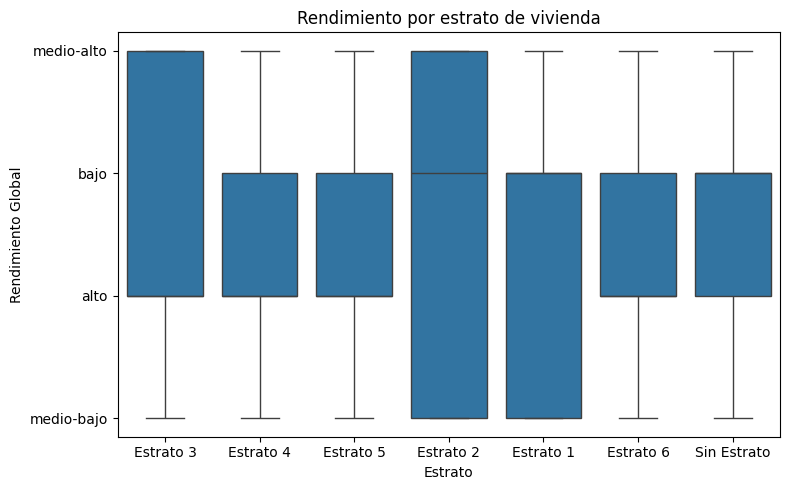

In [96]:
# Estrato de vivienda vs rendimiento
plt.figure(figsize=(8,5))
sns.boxplot(x='FAMI_ESTRATOVIVIENDA', y='RENDIMIENTO_GLOBAL', data=df)
plt.title("Rendimiento por estrato de vivienda")
plt.xlabel("Estrato")
plt.ylabel("Rendimiento Global")
plt.tight_layout()
plt.show()

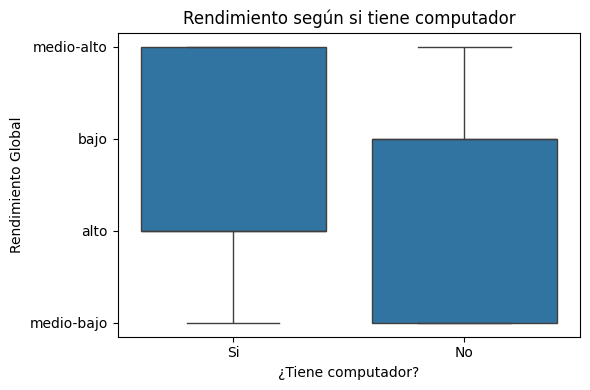

In [97]:
# ¿Tiene computador? vs rendimiento
plt.figure(figsize=(6,4))
sns.boxplot(x='FAMI_TIENECOMPUTADOR', y='RENDIMIENTO_GLOBAL', data=df)
plt.title("Rendimiento según si tiene computador")
plt.xlabel("¿Tiene computador?")
plt.ylabel("Rendimiento Global")
plt.tight_layout()
plt.show()

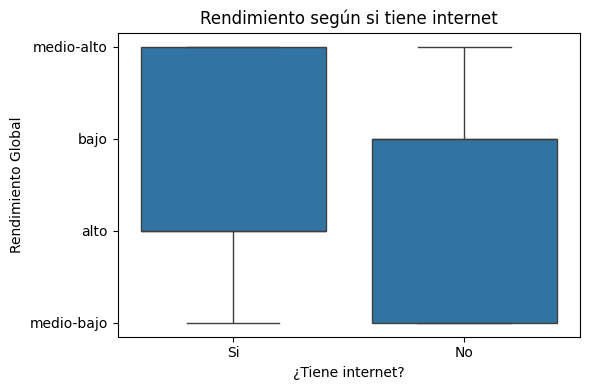

In [99]:
# Internet en casa vs rendimiento
plt.figure(figsize=(6,4))
sns.boxplot(x='FAMI_TIENEINTERNET', y='RENDIMIENTO_GLOBAL', data=df)
plt.title("Rendimiento según si tiene internet")
plt.xlabel("¿Tiene internet?")
plt.ylabel("Rendimiento Global")
plt.tight_layout()
plt.show()

<ipython-input-104-d33515ba6ff3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_programs.index, x=top_programs.values, palette='viridis')


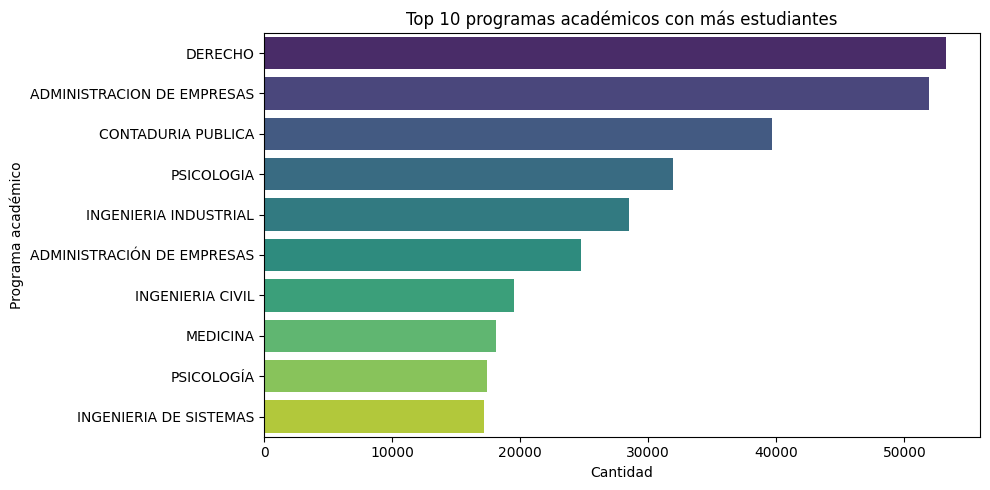

In [104]:
top_programs = df['ESTU_PRGM_ACADEMICO'].value_counts().nlargest(10)
plt.figure(figsize=(10,5))
sns.barplot(y=top_programs.index, x=top_programs.values, palette='viridis')
plt.title("Top 10 programas académicos con más estudiantes")
plt.xlabel("Cantidad")
plt.ylabel("Programa académico")
plt.tight_layout()
plt.show()

<ipython-input-107-e5e61f07e6d4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='FAMI_ESTRATOVIVIENDA', data=df, palette='pastel')


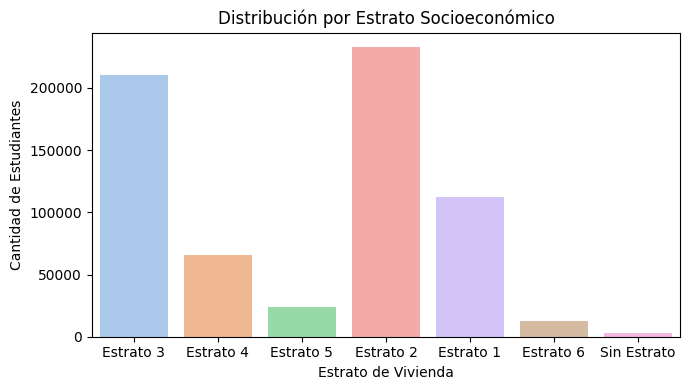

In [107]:
plt.figure(figsize=(7,4))
sns.countplot(x='FAMI_ESTRATOVIVIENDA', data=df, palette='pastel')
plt.title("Distribución por Estrato Socioeconómico")
plt.xlabel("Estrato de Vivienda")
plt.ylabel("Cantidad de Estudiantes")
plt.tight_layout()
plt.show()

<ipython-input-111-2a805876433c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_localidades.index, x=top_localidades.values, palette='viridis')


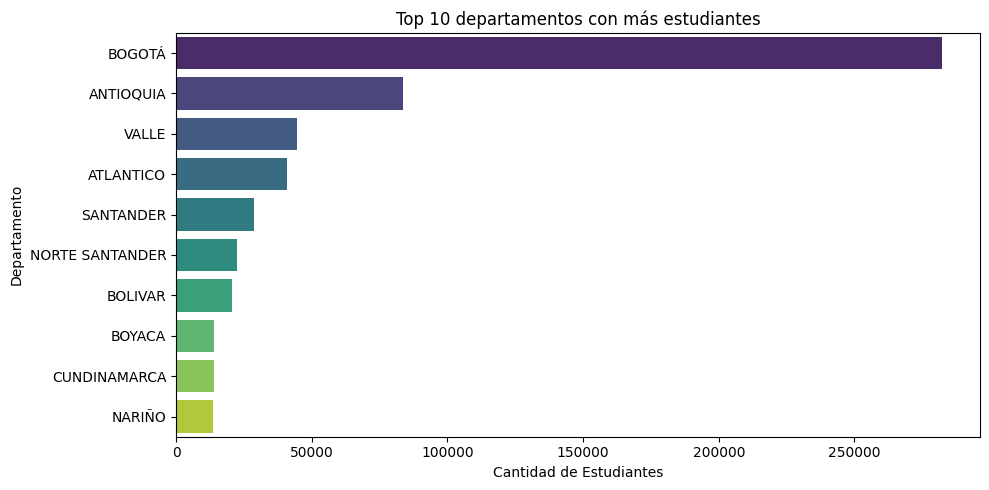

In [111]:
## Barplot para mostrar las 10 localidades con más estudiantes registrados
top_localidades = df['ESTU_PRGM_DEPARTAMENTO'].value_counts().nlargest(10)
plt.figure(figsize=(10,5))
sns.barplot(y=top_localidades.index, x=top_localidades.values, palette='viridis')
plt.title("Top 10 departamentos con más estudiantes")
plt.xlabel("Cantidad de Estudiantes")
plt.ylabel("Departamento")
plt.tight_layout()
plt.show()